# 🎬 I. Analyse du catalogue Netflix

> **Objectif :** Explorer et comprendre le catalogue mondial de Netflix à partir d’un dataset public.  
> Nous allons importer, examiner et préparer les données avant de passer à la visualisation.

---

## 1. Importation des librairies et du dataset
Dans cette première étape, nous allons :
- importer la librairie **pandas** pour manipuler les données,
- charger le fichier `netflix_titles.csv` dans notre environnement.

In [4]:
import pandas as pd

# Lecture du fichier CSV
df = pd.read_csv("netflix_titles.csv")

# Confirmation
print("✅ Fichier chargé avec succès !")
print("Dimensions du dataset :", df.shape)

# Aperçu des 5 premières lignes
df.head()


✅ Fichier chargé avec succès !
Dimensions du dataset : (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. Exploration initiale du dataset

Nous allons maintenant examiner :
- la **taille du dataset** (nombre de lignes et colonnes),
- la **liste des colonnes disponibles**,
- et la **nature générale des informations** contenues.

In [5]:
# Dimensions et noms de colonnes
print("Nombre de lignes et colonnes :", df.shape)
print("\nColonnes disponibles :")
print(df.columns.tolist())


Nombre de lignes et colonnes : (8807, 12)

Colonnes disponibles :
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


### Description des colonnes principales

| Colonne | Signification |
|----------|---------------|
| `type` | Type de contenu (Film ou Série) |
| `title` | Nom du contenu |
| `director` | Réalisateur |
| `cast` | Acteurs principaux |
| `country` | Pays de production |
| `date_added` | Date d’ajout sur Netflix |
| `release_year` | Année de sortie |
| `rating` | Classification d’âge (PG, TV-MA, etc.) |
| `duration` | Durée (minutes ou saisons) |
| `listed_in` | Genres |
| `description` | Résumé du film ou de la série |


## 3. Vérification des données manquantes et du type des colonnes

Avant de nettoyer nos données, vérifions :
- s’il existe des **valeurs manquantes**,
- et si les **types de colonnes** sont corrects.

In [6]:
# Valeurs manquantes par colonne
df.isnull().sum()


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Informations sur les types de variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 🧠 Analyse rapide

- Certaines colonnes contiennent beaucoup de valeurs manquantes (`director`, `cast`, `country`).  
- D'autres sont complètes (`title`, `type`, `release_year`).  
- Nous allons devoir **nettoyer** ces colonnes à l'étape suivante pour garantir la qualité de notre analyse.

---

## 🚀 Étape suivante
Prochaine étape : **Préparation et nettoyage des données**  
Nous allons :
- supprimer les doublons,  
- uniformiser les noms de colonnes,  
- remplir les valeurs manquantes avec des valeurs neutres comme “Inconnu”,  
- et créer de nouvelles colonnes utiles (année d’ajout, genre principal, etc.).

# 🧹 II. Nettoyage et préparation des données

> Objectif : rendre le dataset Netflix exploitable pour l’analyse en supprimant les doublons, en uniformisant les colonnes et en traitant les valeurs manquantes.

## 1. Suppression des doublons

Nous commençons par vérifier si des doublons existent dans le dataset (même `show_id`)  
et les supprimons pour éviter de fausser les statistiques.

In [8]:
# Vérification et suppression des doublons
print("Doublons avant :", df.duplicated(subset='show_id').sum())
df.drop_duplicates(subset='show_id', inplace=True)
print("✅ Doublons supprimés :", df.duplicated(subset='show_id').sum())


Doublons avant : 0
✅ Doublons supprimés : 0


## 2. Uniformisation des noms de colonnes

Les noms de colonnes contiennent parfois des majuscules, espaces ou caractères spéciaux.  
On les rend plus simples à manipuler avec Python.

In [9]:
# Standardisation : minuscules et suppression des espaces
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Vérification
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## 3. Gestion des valeurs manquantes

Certaines colonnes (`director`, `cast`, `country`, etc.) ont des données manquantes.  
Nous remplaçons ces valeurs par **"Inconnu"** afin de conserver toutes les lignes du dataset.

In [10]:
# Colonnes textuelles à compléter
cols_text = ["director", "cast", "country", "rating", "duration"]

for col in cols_text:
    df[col] = df[col].fillna("Inconnu")

# Vérification du nombre de valeurs manquantes restantes
df.isnull().sum()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

## 4. Conversion des dates et création de nouvelles colonnes

Pour enrichir l’analyse, nous ajoutons plusieurs variables dérivées :
- `year_added` → année d’ajout sur Netflix  
- `month_added` → mois d’ajout  
- `main_genre` → premier genre principal  
- `is_tv_show` → indicateur 1 (série) ou 0 (film)

In [11]:
# Conversion de la date
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

# Nouvelles colonnes
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month_name()

df["main_genre"] = df["listed_in"].apply(lambda x: x.split(",")[0] if isinstance(x, str) else "Inconnu")
df["is_tv_show"] = df["type"].apply(lambda x: 1 if x == "TV Show" else 0)

# Vérification
df[["title", "main_genre", "year_added", "is_tv_show"]].head()


,title,main_genre,year_added,is_tv_show
0,Dick Johnson Is Dead,Documentaries,2021.0,0
1,Blood & Water,International TV Shows,2021.0,1
2,Ganglands,Crime TV Shows,2021.0,1
3,Jailbirds New Orleans,Docuseries,2021.0,1
4,Kota Factory,International TV Shows,2021.0,1


## 5. Export du dataset nettoyé

Nous sauvegardons notre dataset propre dans un nouveau fichier CSV  
pour l’utiliser dans les prochaines analyses visuelles.


In [12]:
# Sauvegarde du fichier nettoyé
df.to_csv("netflix_titles_clean.csv", index=False)
print("✅ Données nettoyées enregistrées dans 'netflix_titles_clean.csv'")


✅ Données nettoyées enregistrées dans 'netflix_titles_clean.csv'


## ✅ Bilan du nettoyage

- Doublons supprimés  
- Colonnes uniformisées  
- Valeurs manquantes remplacées  
- Dates converties  
- Nouvelles variables créées  

Notre dataset est désormais **fiable, enrichi et prêt pour l’analyse visuelle** 🎯

# 📊 III. Exploration et visualisation des données

> Objectif : découvrir les principales tendances du catalogue Netflix à l’aide de graphiques.  
> Nous allons examiner :
> - la répartition entre films et séries,  
> - les genres les plus populaires,  
> - l’évolution des sorties au fil des années,  
> - et les principaux pays producteurs.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style visuel
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("pastel")

# Taille par défaut des graphiques
plt.rcParams['figure.figsize'] = (10,5)

## 1. Répartition entre films et séries

Nous allons visualiser la proportion de **films** et de **séries TV** dans le catalogue Netflix.


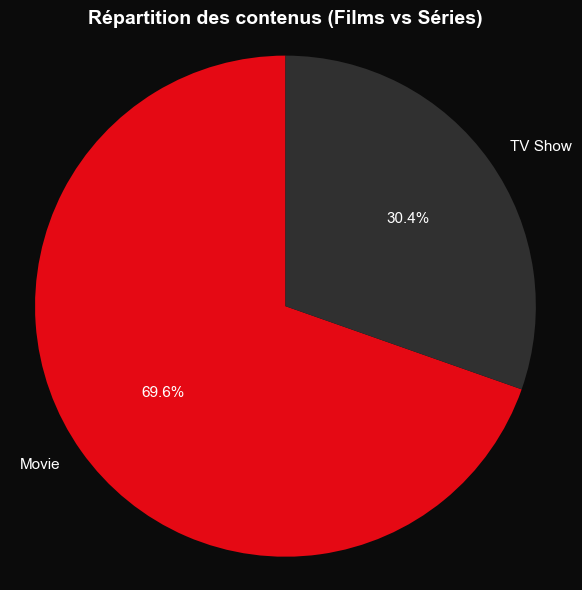

In [19]:
counts = df["type"].value_counts()

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(
    counts.values,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=[NETFLIX_RED, "#303030"],
    textprops={"color": TEXT_MAIN, "fontsize": 11}
)
for w in wedges:
    w.set_linewidth(0)
ax.set_title("Répartition des contenus (Films vs Séries)")
ax.axis("equal")
plt.show()


## 2. Genres les plus populaires

Quels sont les **genres dominants** sur Netflix ?  
Nous allons visualiser les 10 genres principaux du dataset.

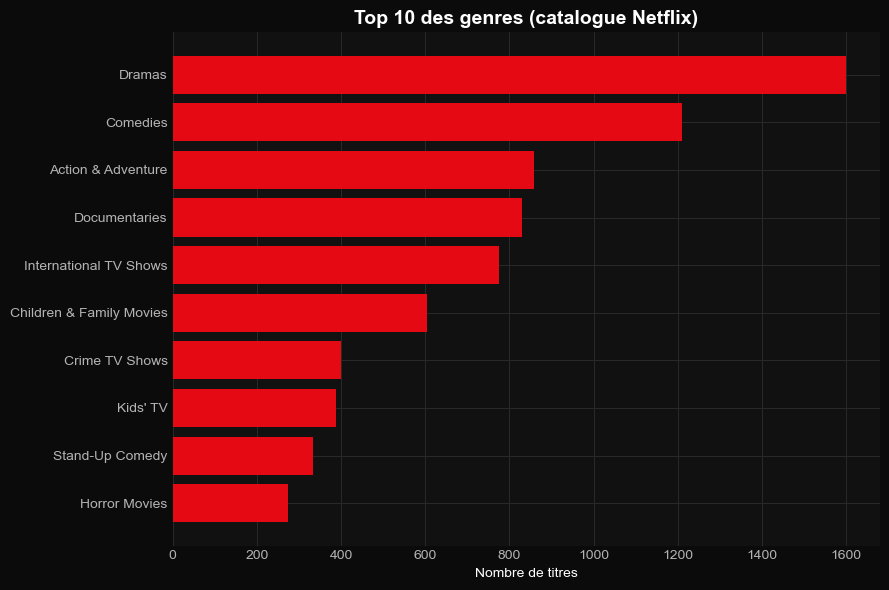

In [20]:
top_genres = df["main_genre"].value_counts().head(10)[::-1]

fig, ax = plt.subplots(figsize=(9,6))
ax.barh(top_genres.index, top_genres.values, color=NETFLIX_RED)
ax.set_xlabel("Nombre de titres")
ax.set_ylabel("")
brand_title(ax, "Top 10 des genres (catalogue Netflix)")
plt.show()


## 3. Évolution des sorties au fil des années

Visualisons la tendance de **production de contenus** selon leur année de sortie (`release_year`).

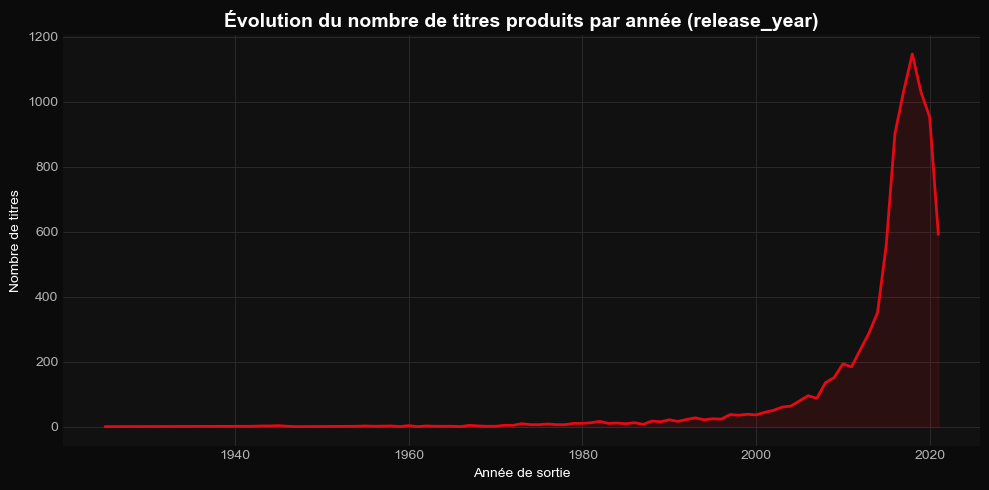

In [21]:
year_counts = df["release_year"].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(year_counts.index, year_counts.values, color=NETFLIX_RED, linewidth=2)
ax.fill_between(year_counts.index, year_counts.values, color=NETFLIX_RED, alpha=0.12)
ax.set_xlabel("Année de sortie")
ax.set_ylabel("Nombre de titres")
brand_title(ax, "Évolution du nombre de titres produits par année (release_year)")
plt.show()


## 4. Croissance du catalogue Netflix

Analysons combien de contenus ont été **ajoutés sur Netflix chaque année** (`year_added`).

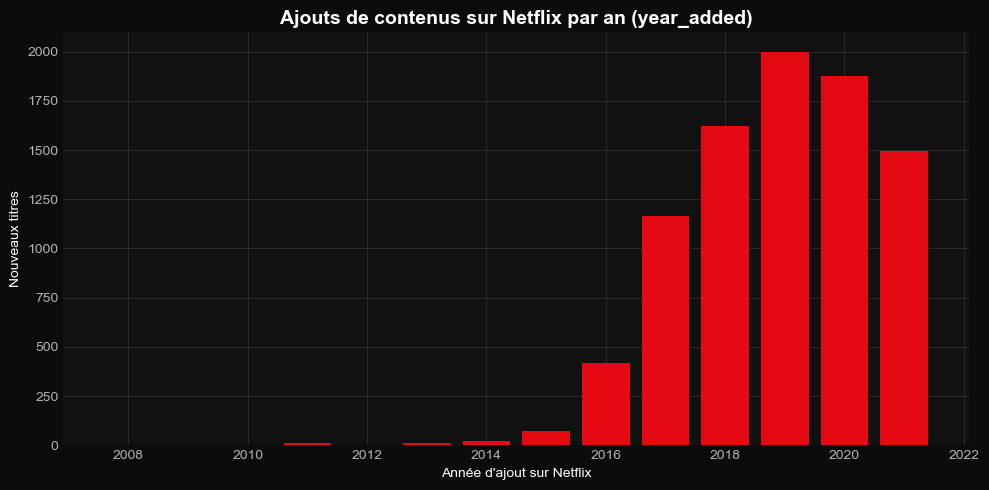

In [22]:
add_per_year = df["year_added"].dropna().astype(int).value_counts().sort_index()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(add_per_year.index, add_per_year.values, color=NETFLIX_RED, width=0.8)
ax.set_xlabel("Année d'ajout sur Netflix")
ax.set_ylabel("Nouveaux titres")
brand_title(ax, "Ajouts de contenus sur Netflix par an (year_added)")
plt.show()


## 5. Principaux pays producteurs

Enfin, découvrons les **10 pays les plus représentés** dans le catalogue Netflix.

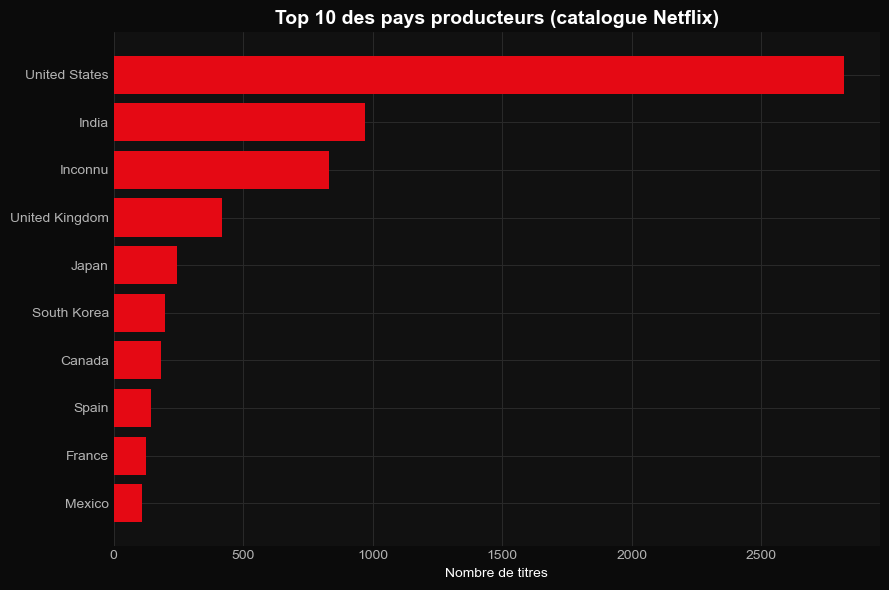

In [23]:
top_countries = df["country"].value_counts().head(10)[::-1]

fig, ax = plt.subplots(figsize=(9,6))
ax.barh(top_countries.index, top_countries.values, color=NETFLIX_RED)
ax.set_xlabel("Nombre de titres")
ax.set_ylabel("")
brand_title(ax, "Top 10 des pays producteurs (catalogue Netflix)")
plt.show()


## ✅ Ce que nous observons

- Netflix propose **plus de films que de séries**, mais la part des séries augmente au fil du temps.  
- Les **genres dominants** sont le **drame**, la **comédie** et les **documentaires**.  
- La **production de contenus** s’accélère depuis 2015.  
- Les **États-Unis**, **Inde** et **Royaume-Uni** sont les pays les plus représentés,  
  mais on observe une **diversification mondiale croissante**.

---

Dans la prochaine partie, nous allons tirer des **insights business** à partir de ces observations,  
et formuler des **recommandations stratégiques** sur la politique de contenu de Netflix.


# 💡 Analyse et conclusions

Après avoir exploré le catalogue Netflix, plusieurs **tendances majeures** se dégagent.  
Ces observations permettent de mieux comprendre la **stratégie de contenu** et les **axes de développement** possibles pour la plateforme.


## 🔎 Ce que les données montrent

- Les **films** sont plus nombreux que les séries, mais ces dernières prennent clairement de la place depuis quelques années.  
- Les **genres les plus présents** (drame, comédie, documentaire) reflètent la volonté de Netflix de couvrir un maximum d’émotions et de publics.  
- Le **nombre de sorties** explose à partir de 2015, au moment où la plateforme a commencé à produire massivement ses propres contenus.  
- Enfin, les **États-Unis**, **l’Inde** et le **Royaume-Uni** dominent la production, mais on voit de plus en plus de titres venant d’autres pays — un signe fort d’ouverture internationale.


## 🧠 Mon interprétation

On sent que Netflix a changé de logique :  
au lieu d’être juste un distributeur, la marque s’est positionnée comme **créatrice de contenu mondial**.  

Les séries ont pris le dessus non pas par hasard, mais parce qu’elles **gardent les gens connectés** plus longtemps.  
C’est une stratégie d’engagement : une série garde un abonné plusieurs semaines, là où un film se consomme en une soirée.

Le développement international n’est pas juste une question d’image :  
en produisant localement (Espagne, Corée, France…), Netflix **touche de nouveaux marchés** tout en créant des succès mondiaux.  
(*La Casa de Papel*, *Squid Game*, *Lupin* en sont les exemples parfaits.)


## 🚀 Ce que j’en retiens

- Continuer à miser sur les **séries locales** à fort potentiel global.  
- Travailler encore plus les **recommandations personnalisées** pour éviter que les utilisateurs se perdent dans la masse de titres.  
- Trouver un meilleur équilibre entre **quantité et qualité** : trop de contenu tue la visibilité des bons titres.  
- Et surtout, maintenir une stratégie de **diversification culturelle** : c’est ce qui rend Netflix universel.


## ✨ Conclusion

Cette petite analyse confirme à quel point la **data guide les décisions** chez Netflix.  
Les tendances visibles dans le catalogue traduisent une stratégie claire :  
créer plus de séries, s’ancrer localement, et renforcer la personnalisation.  

C’est ce type d’approche que j’aime dans la data :  
voir comment des chiffres peuvent raconter une vraie histoire et appuyer des décisions concrètes.
